Import Libraries

In [21]:
## Setup and Data Preparation
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from statsmodels.tsa.stattools import coint
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

Import Data

In [22]:
tickers = [
    # Tech
    'AAPL', 'MSFT', 'GOOGL', 'META', 'NVDA', 'AMD', 'ORCL', 'QCOM',
    # Financials  
    'JPM', 'BAC', 'WFC', 'C', 'GS', 'MS', 'AXP',
    # Energy
    'XOM', 'CVX', 'COP', 'SLB', 'EOG',
    # Consumer Staples
    'KO', 'PEP', 'WMT', 'TGT', 'PG', 'KMB', 'COST', 'MCD', 'NKE',
    # Healthcare
    'JNJ', 'PFE', 'UNH', 'CVS', 'LLY',
    # Industrials/Discretionary
    'HD', 'LOW', 'DIS', 'NFLX', 'TSLA', 'DE'
]

In [23]:
data = yf.download(tickers, start='2024-11-12', end='2025-11-20')['Close']

[*********************100%***********************]  40 of 40 completed


In [24]:
data

Ticker,AAPL,AMD,AXP,BAC,C,COP,COST,CVS,CVX,DE,...,PFE,PG,QCOM,SLB,TGT,TSLA,UNH,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2024-11-12,223.220413,143.630005,285.435150,44.805580,67.156837,106.940582,927.539978,51.814247,146.911530,388.292572,...,24.422869,161.571274,159.812881,43.036247,148.003036,328.489990,601.622375,71.055939,84.169304,115.143219
2024-11-13,224.106415,139.300003,284.574463,44.815342,67.030350,108.081116,928.882874,52.044403,150.156464,384.052185,...,24.917107,162.292221,156.888687,42.317841,147.375458,330.239990,593.009216,71.222328,84.674377,116.214767
2024-11-14,227.192444,138.839996,285.227386,44.844654,66.310326,109.144341,919.094055,52.830776,153.070312,389.170258,...,24.264338,162.779343,160.360565,42.181927,145.930115,311.179993,580.559204,71.251686,83.654335,116.291931
2024-11-15,223.986954,134.899994,283.812653,45.675114,66.903854,108.564407,902.361389,51.008698,152.710815,393.420532,...,23.126656,165.176025,156.966934,41.919804,144.655960,320.720001,579.658691,72.758934,83.436455,115.086182
2024-11-18,226.993362,138.929993,282.496826,45.645805,67.137383,109.956261,914.736877,53.751404,153.637817,398.923218,...,23.182608,166.354889,160.878876,42.220760,148.868317,338.739990,577.133484,72.514244,83.268097,116.050781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-13,272.950012,247.960007,364.730011,52.869999,100.669998,88.597931,925.080017,79.239998,153.861603,473.410004,...,25.790001,147.960007,174.500000,36.310001,90.620003,401.989990,332.519989,84.699997,102.540001,117.760002
2025-11-14,272.410004,246.809998,357.179993,52.610001,100.300003,90.530006,922.979980,77.809998,155.879074,476.230011,...,25.059999,147.669998,173.979996,36.939999,89.900002,404.350006,321.859985,85.050003,102.480003,119.290001
2025-11-17,267.459991,240.520004,341.250000,51.480000,98.190002,88.720001,912.590027,78.410004,153.110001,475.980011,...,25.080000,145.820007,166.750000,35.799999,88.480003,408.920013,320.519989,83.419998,102.949997,117.680000


In [25]:
data.to_parquet('close_1year.parquet', engine='pyarrow')

Generate Correlation Pairs

In [26]:
# Just work with dataframes in memory
returns = data.pct_change().dropna()
corr_matrix = returns.corr()

In [27]:
print(f"Pairs with correlation > 0.7:")
((corr_matrix > 0.7).sum().sum()-40)//2

Pairs with correlation > 0.7:


32

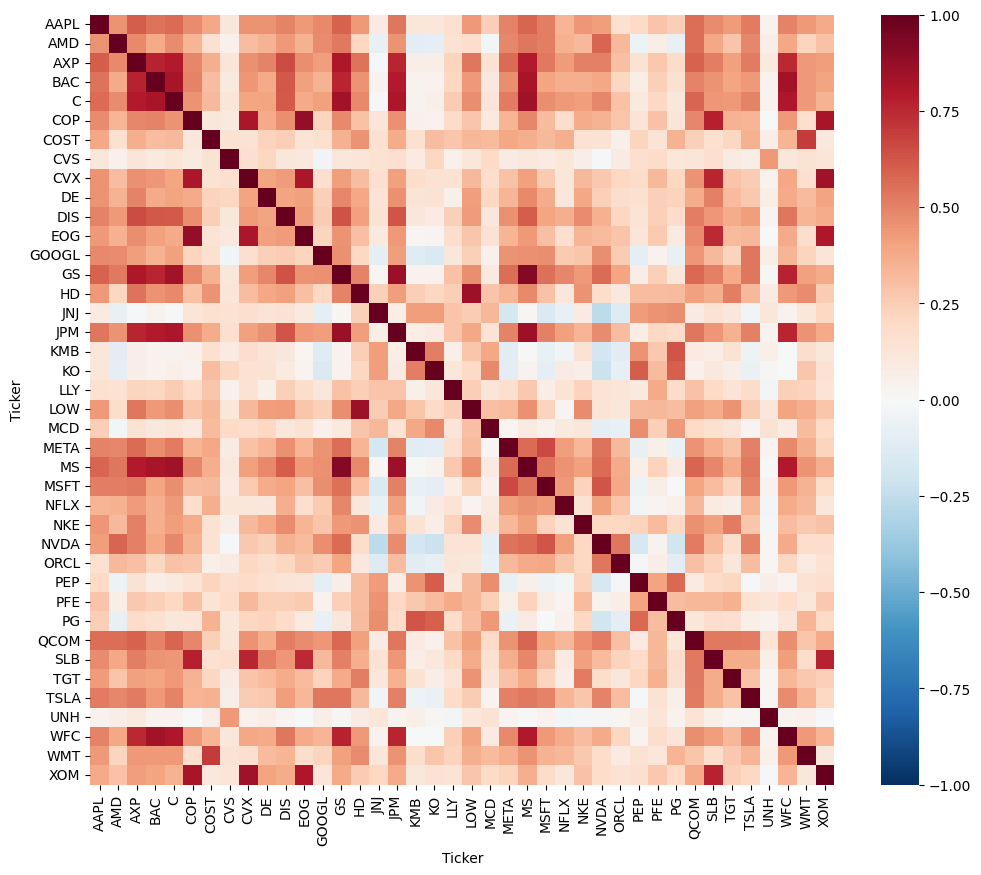

In [28]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='RdBu_r', center=0, vmin=-1, vmax=1)
plt.show()

In [29]:
# Get the high correlation pairs
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > 0.7:
            high_corr_pairs.append({
                'stock1': corr_matrix.columns[i],
                'stock2': corr_matrix.columns[j],
                'correlation': corr_matrix.iloc[i, j]
            })

pairs_df = pd.DataFrame(high_corr_pairs).sort_values('correlation', ascending=False)
print(f"Found {len(pairs_df)} pairs with correlation > 0.7\n")
print(pairs_df)

Found 32 pairs with correlation > 0.7

   stock1 stock2  correlation
25     GS     MS     0.915331
16    COP    EOG     0.876933
24     GS    JPM     0.863481
27     HD    LOW     0.857676
28    JPM     MS     0.852490
13      C     MS     0.849949
21    CVX    XOM     0.847722
11      C     GS     0.839698
10    BAC    WFC     0.839217
6     BAC      C     0.824785
18    COP    XOM     0.821927
9     BAC     MS     0.820409
15    COP    CVX     0.819716
19    CVX    EOG     0.815099
12      C    JPM     0.814122
2     AXP     GS     0.806164
23    EOG    XOM     0.805852
14      C    WFC     0.805055
30     MS    WFC     0.798426
8     BAC    JPM     0.796324
1     AXP      C     0.792717
4     AXP     MS     0.789161
17    COP    SLB     0.778805
31    SLB    XOM     0.773169
0     AXP    BAC     0.768379
26     GS    WFC     0.767932
7     BAC     GS     0.765321
3     AXP    JPM     0.762105
29    JPM    WFC     0.758741
20    CVX    SLB     0.758270
5     AXP    WFC     0.751999
2

Cointegration

In [30]:
# Test cointegration on high correlation pairs
cointegrated_pairs = []

for idx, row in pairs_df.iterrows():
    stock1, stock2 = row['stock1'], row['stock2']
    score, pvalue, _ = coint(data[stock1], data[stock2])
    
    cointegrated_pairs.append({
        'stock1': stock1,
        'stock2': stock2,
        'correlation': row['correlation'],
        'coint_pvalue': pvalue,
        'coint_score': score
    })

coint_df = pd.DataFrame(cointegrated_pairs).sort_values('coint_pvalue')
print(f"\nCointegration test results (sorted by p-value):\n")
print(coint_df)
print(f"\nCointegrated pairs (p < 0.10): {len(coint_df[coint_df['coint_pvalue'] < 0.10])}")


Cointegration test results (sorted by p-value):

   stock1 stock2  correlation  coint_pvalue  coint_score
7       C     GS     0.839698      0.003737    -4.193069
24    AXP    BAC     0.768379      0.006360    -4.036795
25     GS    WFC     0.767932      0.027403    -3.560415
1     COP    EOG     0.876933      0.032555    -3.498207
18     MS    WFC     0.798426      0.044181    -3.383809
28    JPM    WFC     0.758741      0.059841    -3.264137
14      C    JPM     0.814122      0.068882    -3.206292
11    BAC     MS     0.820409      0.081437    -3.135267
21    AXP     MS     0.789161      0.087991    -3.101552
2      GS    JPM     0.863481      0.096559    -3.060294
17      C    WFC     0.805055      0.117580    -2.969720
30    AXP    WFC     0.751999      0.120904    -2.956528
12    COP    CVX     0.819716      0.130100    -2.921364
5       C     MS     0.849949      0.138666    -2.890192
22    COP    SLB     0.778805      0.148004    -2.857735
0      GS     MS     0.915331      0.1

Time Series plot the pairs

In [31]:
p_ten = coint_df[coint_df['coint_pvalue'] < 0.10]
pairs_to_plot = list(zip(p_ten['stock1'], p_ten['stock2']))

In [32]:
pairs_to_plot

[('C', 'GS'),
 ('AXP', 'BAC'),
 ('GS', 'WFC'),
 ('COP', 'EOG'),
 ('MS', 'WFC'),
 ('JPM', 'WFC'),
 ('C', 'JPM'),
 ('BAC', 'MS'),
 ('AXP', 'MS'),
 ('GS', 'JPM')]

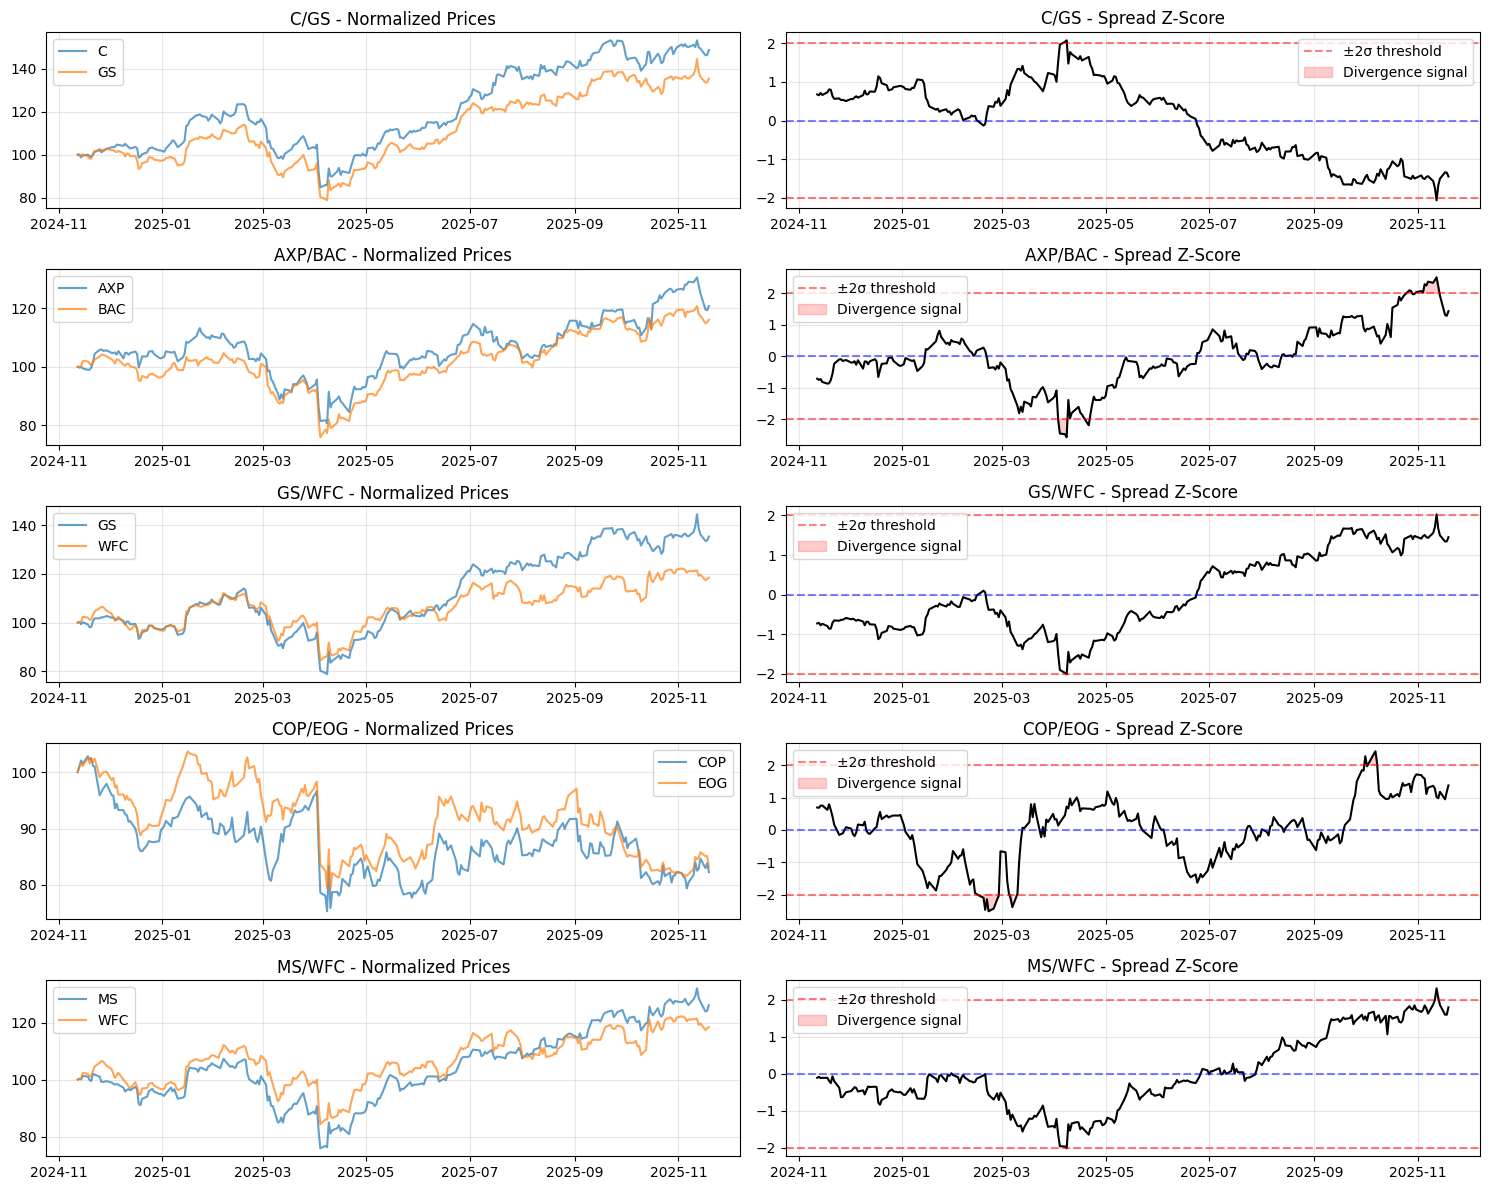

In [33]:
fig, axes = plt.subplots(len(pairs_to_plot[:5]), 2, figsize=(15, 12))

for idx, (stock1, stock2) in enumerate(pairs_to_plot[:5]):
    # Left plot: Normalized prices
    norm_s1 = data[stock1] / data[stock1].iloc[0] * 100
    norm_s2 = data[stock2] / data[stock2].iloc[0] * 100
    
    axes[idx, 0].plot(norm_s1, label=stock1, alpha=0.7)
    axes[idx, 0].plot(norm_s2, label=stock2, alpha=0.7)
    axes[idx, 0].set_title(f'{stock1}/{stock2} - Normalized Prices')
    axes[idx, 0].legend()
    axes[idx, 0].grid(True, alpha=0.3)
    
    # Right plot: Spread with Z-score
    spread = data[stock1] - data[stock2]
    z_score = (spread - spread.mean()) / spread.std()
    
    axes[idx, 1].plot(z_score, color='black', linewidth=1.5)
    axes[idx, 1].axhline(y=0, color='blue', linestyle='--', alpha=0.5)
    axes[idx, 1].axhline(y=2, color='red', linestyle='--', alpha=0.5, label='±2σ threshold')
    axes[idx, 1].axhline(y=-2, color='red', linestyle='--', alpha=0.5)
    axes[idx, 1].fill_between(z_score.index, 2, z_score, where=(z_score > 2), 
                              color='red', alpha=0.2, label='Divergence signal')
    axes[idx, 1].fill_between(z_score.index, -2, z_score, where=(z_score < -2), 
                              color='red', alpha=0.2)
    axes[idx, 1].set_title(f'{stock1}/{stock2} - Spread Z-Score')
    axes[idx, 1].legend()
    axes[idx, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Function Build Approach

In [34]:
# 1) Create an s3 Bucket with three folders - raw, processed, dashboard
# 2) Create Function #1 - Pulls historical data and appends to parquet file in raw
# 3) Create Function #2 - Opens historical data, processes correlations, spreads, etc.  and appeands to spreads file in processed
# 4) Create Function #3 - Opens historical and processed - creates multiple json files -> See claude chat for details
# 5) D3 Dashboard dlazy loads data from json files

In [35]:
pd.read_parquet('close_1year.parquet').tail(3)

Ticker,AAPL,AMD,AXP,BAC,C,COP,COST,CVS,CVX,DE,...,PFE,PG,QCOM,SLB,TGT,TSLA,UNH,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2025-11-17,267.459991,240.520004,341.250000,51.480000,98.190002,88.720001,912.590027,78.410004,153.110001,475.980011,...,25.080000,145.820007,166.750000,35.799999,88.480003,408.920013,320.519989,83.419998,102.949997,117.680000
2025-11-18,267.440002,230.289993,340.660004,51.639999,98.320000,89.680000,895.080017,77.940002,153.619995,473.850006,...,25.450001,146.990005,165.059998,36.040001,88.529999,401.250000,313.579987,83.860001,101.389999,119.029999
2025-11-19,268.559998,223.550003,344.640015,52.020000,99.830002,87.980003,890.599976,76.550003,151.699997,474.769989,...,24.879999,146.990005,166.110001,35.860001,86.080002,403.989990,309.089996,84.160004,100.610001,117.349998
